In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
dfchurn = pd.read_csv(r'C:\Users\Crist\Churn_Prediction\Data\unclean_data.csv')

In [3]:
dfchurn = dfchurn.rename(columns = {'FreshmanRetained':'Churn'})
dfchurn['Churn'] = dfchurn['Churn'].replace({1:0,0:1})

In [4]:
dfchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21026 entries, 0 to 21025
Data columns (total 14 columns):
UNIQUE_ID         21026 non-null int64
COHORT            21026 non-null object
NATIVE_COLLEGE    21026 non-null object
GENDER            21021 non-null object
ETHNICITY         21025 non-null object
RESIDENCY         21026 non-null object
AOA_RSNCODE       21026 non-null object
MothersEd         20285 non-null float64
FathersEd         20103 non-null float64
HS_GPA            20601 non-null float64
PARTNER_SCHOOL    21026 non-null object
SATRead           20931 non-null float64
SATMath           20928 non-null float64
Churn             21026 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


In [5]:
dfchurn.COHORT.unique()

array(['FTF_2108', 'FTF_2118', 'FTF_2128', 'FTF_2138', 'FTF_2148'],
      dtype=object)

Making a neater format for `COHORT`

In [6]:
dfchurn['COHORT'] = dfchurn['COHORT'].replace({'FTF_2108':'2010', 'FTF_2118':'2011', 'FTF_2128':'2012', 'FTF_2138':'2013', 'FTF_2148':'2014'})

In [7]:
dfchurn['COHORT'].unique()

array(['2010', '2011', '2012', '2013', '2014'], dtype=object)

In [8]:
for col in dfchurn.columns[2:9]:
    print(col,dfchurn[col].unique())

NATIVE_COLLEGE ['BUS' 'LA' 'ENG' 'SM' 'AGR' 'DES']
GENDER ['F' 'M' nan]
ETHNICITY ['WHITE' 'HISPA' 'ASIAN' 'TWOMORE' 'DECLINE' 'BLACK' 'AMIND' nan]
RESIDENCY ['Resident' 'Non Res' 'Foreign Co']
AOA_RSNCODE ['Mand' 'Acad' 'Other' 'Early' 'Adm']
MothersEd [ 6.  7.  4.  5.  3. nan  1.  2.]
FathersEd [ 6.  5.  7.  4.  1. nan  3.  2.]


Above columns look good. 

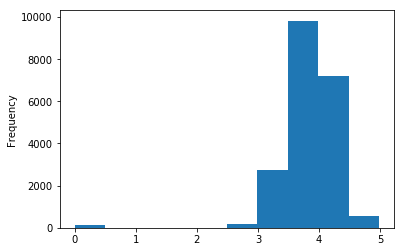

In [9]:
dfchurn['HS_GPA'].plot.hist()

In [10]:
dfchurn.loc[dfchurn['HS_GPA'].isnull()].head()

,UNIQUE_ID,COHORT,NATIVE_COLLEGE,GENDER,ETHNICITY,RESIDENCY,AOA_RSNCODE,MothersEd,FathersEd,HS_GPA,PARTNER_SCHOOL,SATRead,SATMath,Churn
12,13771427,2010,DES,M,HISPA,Resident,Other,4.0,1.0,NaN,No,450.0,600.0,0
99,121212163,2010,ENG,M,WHITE,Resident,Acad,7.0,7.0,NaN,No,570.0,510.0,0
118,139484780,2010,SM,M,WHITE,Resident,Mand,6.0,7.0,NaN,No,520.0,590.0,0
160,192436989,2010,BUS,M,TWOMORE,Resident,Other,4.0,4.0,NaN,No,540.0,550.0,0
182,216580175,2010,LA,F,WHITE,Resident,Acad,6.0,7.0,NaN,No,650.0,600.0,0


The `HS_GPA` column has missing values and values with 0s. We will work with the assumption that 0s have some meaning and create an indicator variable.

In [11]:
dfchurn.PARTNER_SCHOOL.unique()

array(['No', 'Yes'], dtype=object)

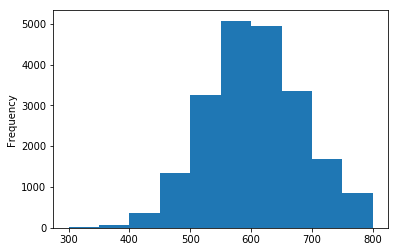

In [12]:
dfchurn.SATRead.plot.hist()

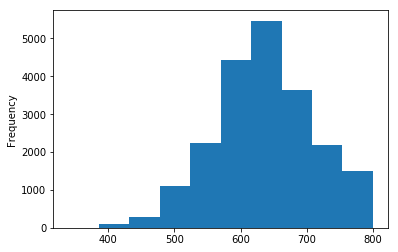

In [13]:
dfchurn.SATMath.plot.hist()

([<matplotlib.axis.XTick at 0x7f519938ccf8>,
 <a list of 2 Text xticklabel objects>)

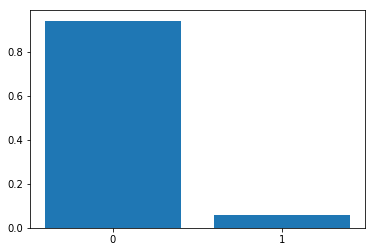

In [14]:
from matplotlib import pyplot as plt
plt.bar(dfchurn.Churn.unique(),dfchurn.Churn.value_counts()/len(dfchurn.Churn))
plt.xticks(np.array([0,1]))

In [15]:
dfchurn.COHORT.unique()

array(['2010', '2011', '2012', '2013', '2014'], dtype=object)

In [16]:
dfchurn.to_csv('10_14_Churn.csv')